In [80]:
import urllib
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

sns.set_theme(style="darkgrid")

In [2]:
tb_deaths_url = "https://docs.google.com/spreadsheets/d/12uWVH_IlmzJX_75bJ3IH5E-Gqx6-zfbDKNvZqYjUuso/pub?gid=0&output=csv"
tb_existing_url = "https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv"
tb_new_url = "https://docs.google.com/spreadsheets/d/1Pl51PcEGlO9Hp4Uh0x2_QM0xVb53p2UDBMPwcnSjFTk/pub?gid=0&output=csv"
urls = [tb_deaths_url, tb_existing_url, tb_new_url]


tb_deaths_file = "data/tb_deaths_100k.csv"
tb_existing_file = "data/tb_existing_100k.csv"
tb_new_file = "data/tb_new_100k.csv"
files = [tb_deaths_file, tb_existing_file, tb_new_file]

In [3]:
# [
#     urllib.request.urlretrieve(*arg) for arg in zip(urls, files)
# ]  # Loops over each url, file location to download them

In [4]:
deaths_df, existing_df, new_df = [
    pd.read_csv(file, index_col=0, thousands=",").T for file in files
]

In [5]:
for df in [deaths_df, existing_df, new_df]:
    df.index.names = ["year"]
    df.columns.names = ["country"]

In [6]:
mean_cases_per_period = existing_df.groupby(lambda x: int(x) > 1999).mean()
mean_cases_per_period.index = ["1990-1999", "2000-2007"]
mean_cases_per_period

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990-1999,403.700,42.1,43.90,16.200,30.3,474.40,36.400,12.800,76.6,64.400,...,30.600,117.00,234.500,42.300,323.300,152.900,49.800,234.500,557.200,428.10
2000-2007,290.375,30.5,51.75,7.375,19.0,337.25,34.625,8.375,42.0,88.125,...,24.875,143.75,125.375,39.125,231.875,92.875,35.375,144.125,507.875,618.75


In [26]:
# Get the world trend by summing over the countries axis
[deaths_total_per_year, existing_total_per_year, new_total_per_year] = [
    df.sum(axis=1) for df in [deaths_df, existing_df, new_df]
]
world_trend_df = pd.DataFrame(
    {
        "Total deaths per 100k": deaths_total_per_year,
        "Total existing cases per 100k": existing_total_per_year,
        "Total new cases per 100k": new_total_per_year,
    },
    index=deaths_total_per_year.index,
)
world_trend_df

,Total deaths per 100k,Total existing cases per 100k,Total new cases per 100k
year,,,
1990,4938,40772,21855.0
1991,5108,40669,22288.0
1992,5194,39912,22421.0
1993,5372,39573,22836.0
1994,5471,39066,23177.0
1995,5655,38904,23639.0
1996,5502,37032,23878.0
1997,5658,37462,24608.0
1998,5666,36871,25154.0


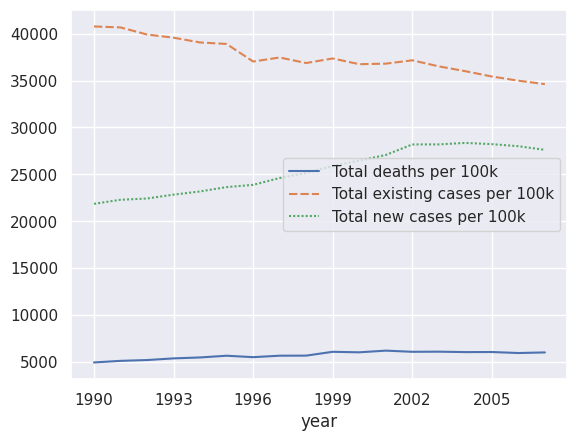

In [112]:
# General tendency: the existing cases are diminishing although new cases are increasing
years = deaths_df.index
p1 = sns.lineplot(data=world_trend_df)
p1.set_xticks(np.arange(0, len(years), 3))

In [28]:
# Let's compute the means
[deaths_by_country_mean, existing_by_country_mean, new_by_country_mean] = [
    df.mean() for df in [deaths_df, existing_df, new_df]
]
[
    deaths_by_country_mean_summary,
    existing_by_country_mean_summary,
    new_by_country_mean_summary,
] = [
    df.describe()
    for df in [deaths_by_country_mean, existing_by_country_mean, new_by_country_mean]
]

In [52]:
# Outlier threshold 1.5 times above median
[deaths_outlier, existing_outlier, new_outlier] = [
    df.loc["50%"] * 1.5
    for df in [
        deaths_by_country_mean_summary,
        existing_by_country_mean_summary,
        new_by_country_mean_summary,
    ]
]

# Finding outlier countries
[
    outlier_countries_by_deaths_index,
    outlier_countries_by_existing_index,
    outlier_countries_by_new_index,
] = [
    df > outlier
    for (df, outlier) in zip(
        [deaths_by_country_mean, existing_by_country_mean, new_by_country_mean],
        [deaths_outlier, existing_outlier, new_outlier],
    )
]
# Proportion of outliers
[
    proportion_outliers_by_deaths,
    proportion_outliers_by_existing,
    proportion_outliers_by_new,
] = [
    sum(outlier_df) / len(df.T)
    for (outlier_df, df) in zip(
        [
            outlier_countries_by_deaths_index,
            outlier_countries_by_existing_index,
            outlier_countries_by_new_index,
        ],
        [deaths_df, existing_df, new_df],
    )
]
print(
    f"The proportion of outliers is {np.round(100*proportion_outliers_by_deaths,1)}% for deaths, {np.round(100*proportion_outliers_by_existing,1)}% for existing cases and {np.round(100*proportion_outliers_by_new,1)}% for new cases!"
)
# Let us filter for outliers
[outlier_deaths_df, outlier_existing_df, outlier_new_df] = [
    df.T.loc[outlier_df].T
    for (df, outlier_df) in zip(
        [deaths_df, existing_df, new_df],
        [
            outlier_countries_by_deaths_index,
            outlier_countries_by_existing_index,
            outlier_countries_by_new_index,
        ],
    )
]

The proportion of outliers is 39.6% for deaths, 39.6% for existing cases and 38.5% for new cases!


In [53]:
# Outlier threshold 5 times above median
[deaths_super_outlier, existing_super_outlier, new_super_outlier] = [
    df.loc["50%"] * 5
    for df in [
        deaths_by_country_mean_summary,
        existing_by_country_mean_summary,
        new_by_country_mean_summary,
    ]
]

# Finding outlier countries
[
    super_outlier_countries_by_deaths_index,
    super_outlier_countries_by_existing_index,
    super_outlier_countries_by_new_index,
] = [
    df > outlier
    for (df, outlier) in zip(
        [deaths_by_country_mean, existing_by_country_mean, new_by_country_mean],
        [deaths_super_outlier, existing_super_outlier, new_super_outlier],
    )
]
# Proportion of outliers
[
    proportion_super_outliers_by_deaths,
    proportion_super_outliers_by_existing,
    proportion_super_outliers_by_new,
] = [
    sum(outlier_df) / len(df.T)
    for (outlier_df, df) in zip(
        [
            super_outlier_countries_by_deaths_index,
            super_outlier_countries_by_existing_index,
            super_outlier_countries_by_new_index,
        ],
        [deaths_df, existing_df, new_df],
    )
]
print(
    f"The proportion of outliers is {np.round(100*proportion_super_outliers_by_deaths,1)}% for deaths, {np.round(100*proportion_super_outliers_by_existing,1)}% for existing cases and {np.round(100*proportion_super_outliers_by_new,1)}% for new cases!"
)
# Let us filter for outliers
[super_outlier_deaths_df, super_outlier_existing_df, super_outlier_new_df] = [
    df.T.loc[outlier_df].T
    for (df, outlier_df) in zip(
        [deaths_df, existing_df, new_df],
        [
            super_outlier_countries_by_deaths_index,
            super_outlier_countries_by_existing_index,
            super_outlier_countries_by_new_index,
        ],
    )
]

The proportion of outliers is 21.7% for deaths, 14.0% for existing cases and 10.6% for new cases!


In [67]:
# How many countries are outliers?
[
    len(df.T)
    for df in [super_outlier_deaths_df, super_outlier_existing_df, super_outlier_new_df]
]

[45, 29, 22]

In [74]:
# Let's create a country representing the average outlier
[
    average_super_outlier_deaths_country,
    average_super_outlier_existing_country,
    average_super_outlier_new_country,
] = [
    df.mean(axis=1)
    for df in [super_outlier_deaths_df, super_outlier_existing_df, super_outlier_new_df]
]

# Let's create a country representing the average non-outlier
[
    average_better_world_country_deaths,
    average_better_world_country_existing,
    average_better_world_country_new,
] = [
    df.T.loc[-super_outlier].T.mean(axis=1)
    for (df, super_outlier) in zip(
        [deaths_df, existing_df, new_df],
        [
            super_outlier_countries_by_deaths_index,
            super_outlier_countries_by_existing_index,
            super_outlier_countries_by_new_index,
        ],
    )
]

In [81]:
[two_world_deaths_df, two_world_existing_df, two_world_new_df] = [
    pd.DataFrame(
        {
            "Average Better World Country": average_better_world_country,
            "Average Outlier Country": average_outlier_country,
        }
    )
    for (average_better_world_country, average_outlier_country) in zip(
        [
            average_better_world_country_deaths,
            average_better_world_country_existing,
            average_better_world_country_new,
        ],
        [
            average_super_outlier_deaths_country,
            average_super_outlier_existing_country,
            average_super_outlier_new_country,
        ],
    )
]

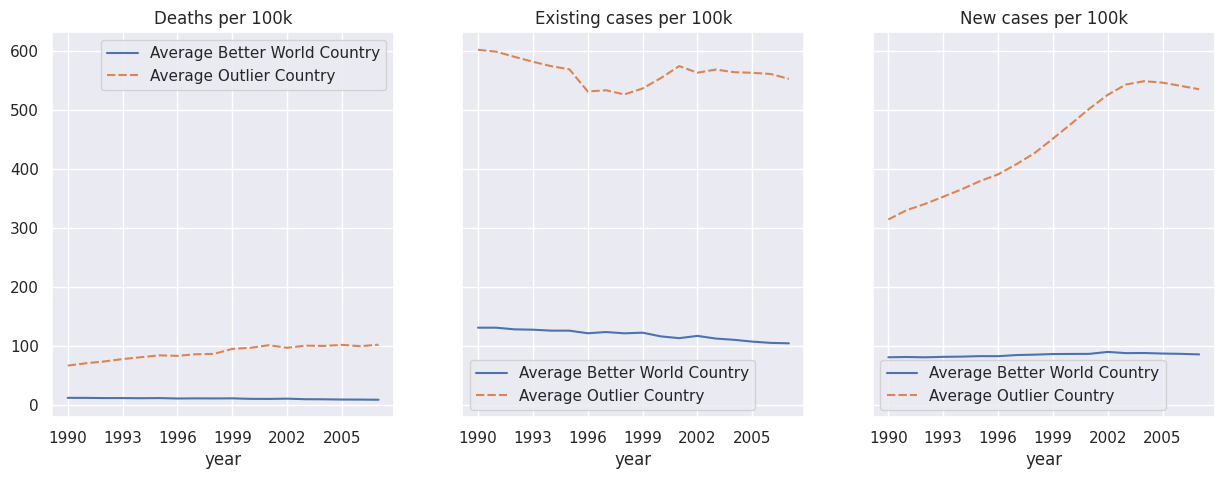

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

years = new_df.index

p1 = sns.lineplot(ax=axes[0], data=two_world_deaths_df)
p2 = sns.lineplot(ax=axes[1], data=two_world_existing_df)
p3 = sns.lineplot(ax=axes[2], data=two_world_new_df)


p1.set_title("Deaths per 100k")
p2.set_title("Existing cases per 100k")
p3.set_title("New cases per 100k")

p1.set_xticks(np.arange(0, len(years), 3))
p2.set_xticks(np.arange(0, len(years), 3))
p3.set_xticks(np.arange(0, len(years), 3))

In [100]:
[
    two_world_deaths_pctchange_df,
    two_world_existing_pctchange_df,
    two_world_new_pctchange_df,
] = [
    two_world_df.pct_change()
    for two_world_df in [two_world_deaths_df, two_world_existing_df, two_world_new_df]
]

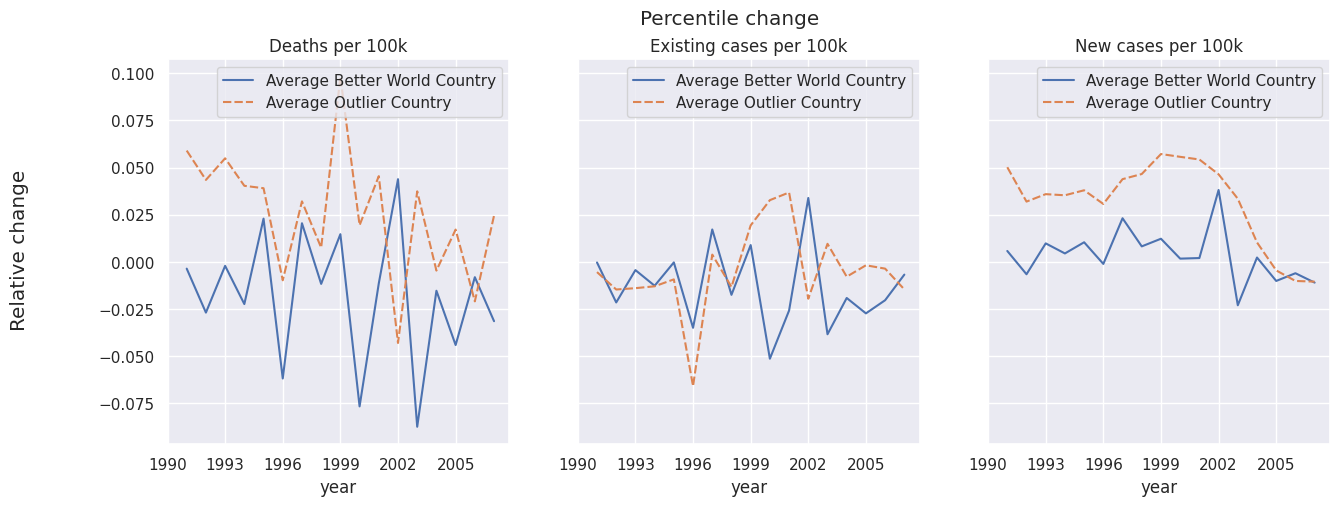

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
years = new_df.index

p1 = sns.lineplot(ax=axes[0], data=two_world_deaths_pctchange_df)
p2 = sns.lineplot(ax=axes[1], data=two_world_existing_pctchange_df)
p3 = sns.lineplot(ax=axes[2], data=two_world_new_pctchange_df)

fig.suptitle("Percentile change")
fig.supylabel("Relative change")
p1.set_title("Deaths per 100k")
p2.set_title("Existing cases per 100k")
p3.set_title("New cases per 100k")

p1.set_xticks(np.arange(0, len(years), 3))
p2.set_xticks(np.arange(0, len(years), 3))
p3.set_xticks(np.arange(0, len(years), 3))